In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('Churn_Modelling.csv')

print("Verisetinin ilk 5 satırı:")
display(df.head())

print("\nVeri Özeti:")
df.info()

Verisetinin ilk 5 satırı:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Veri Özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("Gereksiz sütunlar çıkarıldı.")
print(df_clean.columns)

Gereksiz sütunlar çıkarıldı.
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


/tmp/ipython-input-3216764567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df_clean, palette='viridis')


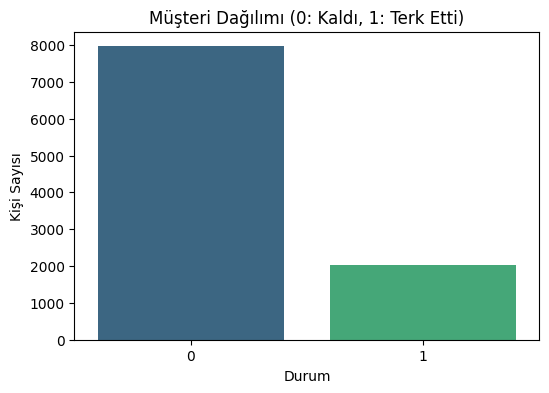

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df_clean, palette='viridis')
plt.title('Müşteri Dağılımı (0: Kaldı, 1: Terk Etti)')
plt.xlabel('Durum')
plt.ylabel('Kişi Sayısı')
plt.show()

print(df_clean['Exited'].value_counts(normalize=True))

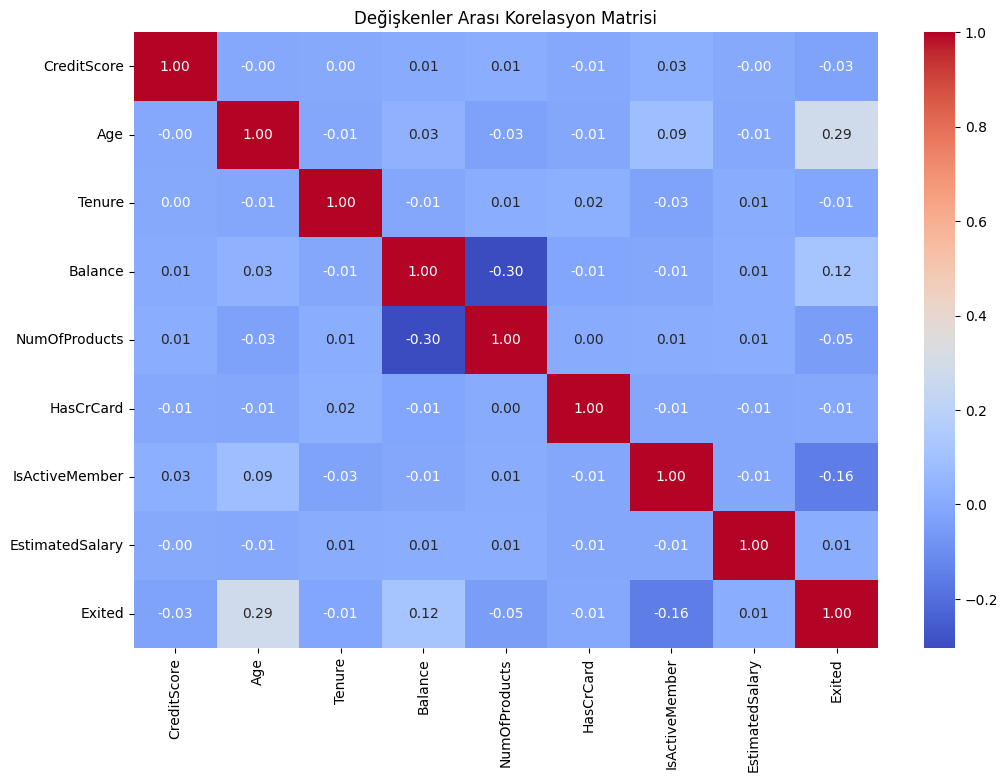

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df_clean.select_dtypes(include=['number'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

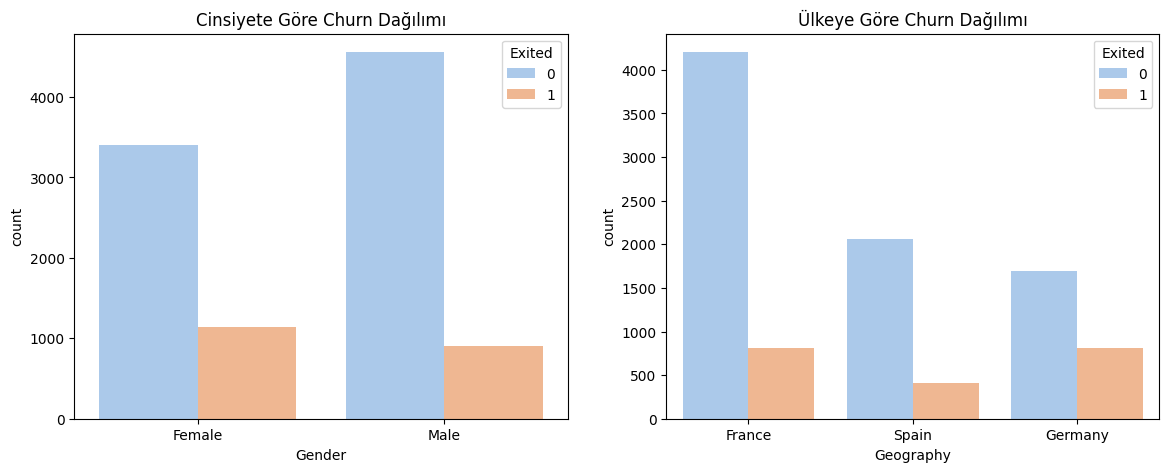

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='Exited', data=df_clean, ax=ax[0], palette='pastel')
ax[0].set_title('Cinsiyete Göre Churn Dağılımı')

sns.countplot(x='Geography', hue='Exited', data=df_clean, ax=ax[1], palette='pastel')
ax[1].set_title('Ülkeye Göre Churn Dağılımı')

plt.show()